In [ ]:
pip install opencv-python

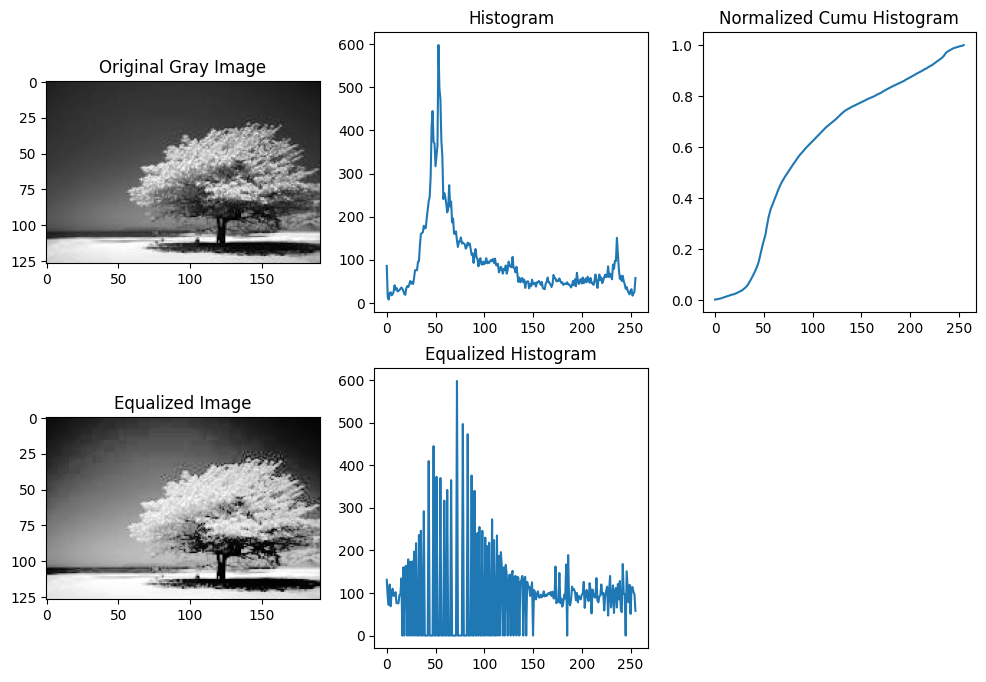

In [ ]:
#Q1
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpeg', cv2.IMREAD_GRAYSCALE)  #grayscale

#Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

#Calculate Cumulative histogram
cum_hist = np.cumsum(hist)

#Normalize Cumulative histogram
normalized_cumulative_hist = cum_hist / cum_hist[-1]

#Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

#Show all images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Gray Image')
plt.subplot(2, 3, 2), plt.plot(hist), plt.title('Histogram')
plt.subplot(2, 3, 3), plt.plot(normalized_cumulative_hist), plt.title('Normalized Cumu Histogram')
plt.subplot(2, 3, 4), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.subplot(2, 3, 5), plt.plot(cv2.calcHist([equalized_image], [0], None, [256], [0, 256])), plt.title('Equalized Histogram')
plt.show()


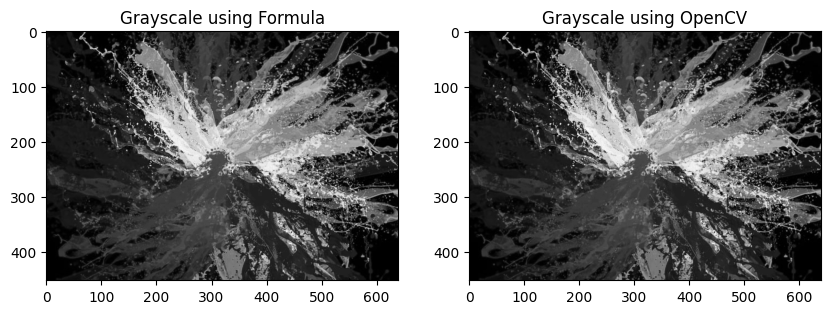

In [ ]:
#Q2
import cv2
import matplotlib.pyplot as plt

rgb_image = cv2.imread('rgb.jpg')

#Using formula to convert to grayscale
gray_img_formula = 0.299 * rgb_image[:, :, 2] + 0.587 * rgb_image[:, :, 1] + 0.114 * rgb_image[:, :, 0]

#Using OpenCV Built-In Function (cv2.cvtColor())
gray_img_opencv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_img_formula, cmap='gray')
plt.title('Grayscale using Formula')

plt.subplot(1, 2, 2)
plt.imshow(gray_img_opencv, cmap='gray')
plt.title('Grayscale using OpenCV')
plt.show() #both looks same

In [ ]:
#Q3
import cv2
import numpy as np

original_image = cv2.imread('rgb.jpg')
resolutions = [(800, 600), (400, 200), (1600, 900), (750, 460), (960, 1300)] #given
resolution_results = {}

for resolution in resolutions:
    # Resize the original image to match the target resolution
    resized_image = cv2.resize(original_image, resolution)

    # Resize the resized_image back to the original size for comparison
    resized_back = cv2.resize(resized_image, original_image.shape[:2][::-1])
    # Mean Squared Error (MSE)
    mse = np.mean((original_image - resized_back) ** 2)
    resolution_results[resolution] = mse
for resolution, mse in resolution_results.items():
    print(f"Resolution: {resolution[0]}x{resolution[1]}")
    print(f"Mean Squared Error (MSE): {mse}")

# You can conclude the differences based on the MSE values.

Resolution: 800x600
Mean Squared Error (MSE): 18.48788025442478
Resolution: 400x200
Mean Squared Error (MSE): 40.8131648691003
Resolution: 1600x900
Mean Squared Error (MSE): 10.19841330199115
Resolution: 750x460
Mean Squared Error (MSE): 22.07839233038348
Resolution: 960x1300
Mean Squared Error (MSE): 12.193614030235988


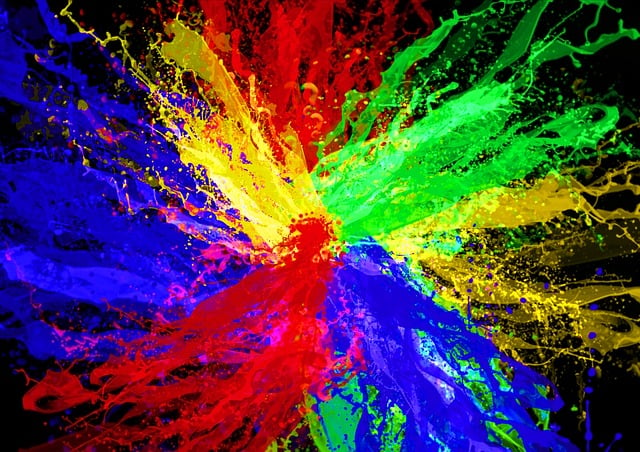

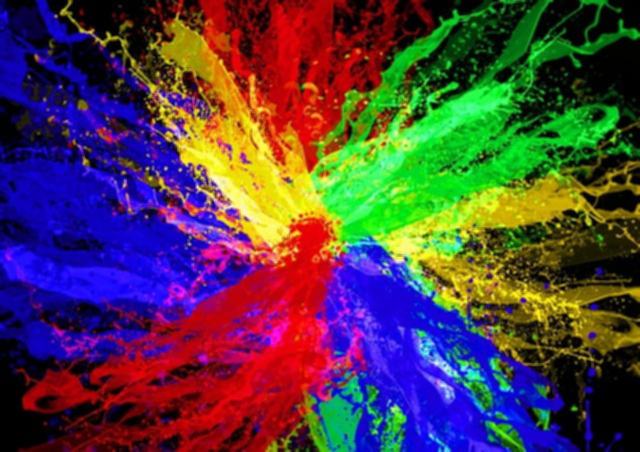

In [ ]:
#Q4
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('rgb.jpg')
# Define a 3x3 Box Blur Kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.float32) / 9.0  # Normalized kernel

# Apply convolution using OpenCV
blurred_image = cv2.filter2D(image, -1, kernel)
# original image
cv2_imshow(image)
# blurred image
cv2_imshow(blurred_image)

Maximum Correlation Value: 5149.4220991925695
Position of Maximum Correlation: (101, 132)


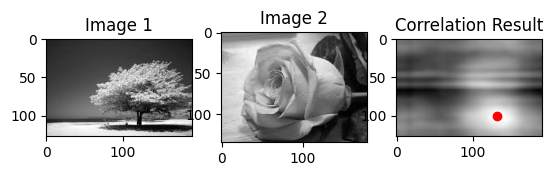

In [ ]:
#Q5
import cv2
import numpy as np
from scipy.signal import correlate2d

# Load your images
image1 = cv2.imread('img.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None:
    print("Error: One or both images couldn't be loaded.")
else:
    # Normalize the images
    image1_normalized = image1 / 255.0
    image2_normalized = image2 / 255.0

    # Perform cross-correlation
    correlation_result = correlate2d(image1_normalized, image2_normalized, mode='same', boundary='wrap')

    # Find the maximum correlation value and its position
    max_correlation_value = np.max(correlation_result)
    max_correlation_position = np.unravel_index(np.argmax(correlation_result), correlation_result.shape)
    print(f"Maximum Correlation Value: {max_correlation_value}")
    print(f"Position of Maximum Correlation: {max_correlation_position}")

    plt.subplot(131)
    plt.imshow(image1, cmap='gray')
    plt.title('Image 1')

    plt.subplot(132)
    plt.imshow(image2, cmap='gray')
    plt.title('Image 2')

    plt.subplot(133)
    plt.imshow(correlation_result, cmap='gray')
    plt.title('Correlation Result')
    plt.plot(max_correlation_position[1], max_correlation_position[0], 'ro')  # Red dot at the matched position
    plt.show()